# Pair Programming Métricas

In [1]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

* Calculad las métricas para vuestro modelo:

In [2]:
df_est_balan = pd.read_csv("datos/diabetes_est_balanc.csv", index_col=0)
df_est_balan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,-0.851320,1.950912,-0.735818,0.609530,1.535007,0.296742,0.474248,1
1,-0.239421,0.241424,1.777768,1.820621,1.212835,0.655759,-0.068827,1


In [3]:
X1 = df_est_balan.drop("Outcome", axis = 1)
y1 = df_est_balan["Outcome"]

In [4]:
X1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,-0.851320,1.950912,-0.735818,0.609530,1.535007,0.296742,0.474248
1,-0.239421,0.241424,1.777768,1.820621,1.212835,0.655759,-0.068827


In [5]:
y1.head(2)

0    1
1    1
Name: Outcome, dtype: int64

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [7]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [8]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
235,1,1,Train
479,1,0,Train
603,1,0,Train
61,1,0,Train
145,0,0,Train


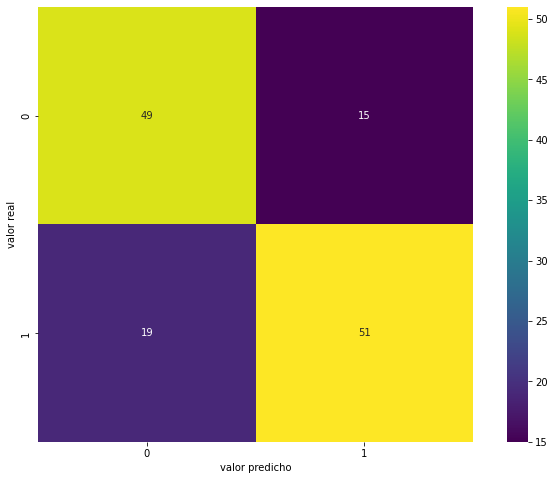

In [9]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

A raiz de la matriz de confusión definiremos las métricas de precisión de nuestras predicciones:

In [10]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [11]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta


En nuestro caso lo que nos interesa es que los Falsos Positivos (19 según la matriz de confusión) sean lo más bajos posible, dado que sería contraproducente que una persona fuera diabética pero su diagnóstico fuera negativo.


* Accuracy (% de valores bien predichos): 79%. Según la matriz de confusión se corresponde a los valores Verdadero Positivo (45) y a los Verdaderos Negativos (55). Cuánto más elevada es esta métrica, mejor dado que indica el porcentaje de aciertos.

* Precision (% de predicciones positivas fueron correctas): 87% . Considerando la matriz de confusión este 87% correspondería a los Verdaderos Positivos (45), es decir que nuestro modelo tiene un 13% (19) de probabilidades de equivocarse en el diagnóstico positivo.

* Recall(% de positivos capturados):74%. Para calcularlo ha tenido en cuenta los Verdaderos Positivos (45) y los Falsos Negativos (8). Nuestro modelo es capaz de capturar el 74% de los diabéticos que de verdad lo son.

Es preferible que la precisión (% de predicciones positivas correctas) sea más alta que el recall (% de casos positivos capturados) y así ocurre si observamos las métricas obtenidas en nuestro caso.

* Kappa (medida de la concordancia): 0.6 que está en el límite entre moderado y bueno. Nuestro modelo acierta en parte al azar.

Si comparamos los valores de Precisión y Kappa de el test y el entrenamiento, podemos decir que el valor del test es mejor, porque tiene ambas métricas más elevadas (siendo siempre preferible tener menos precisión pero una kappa más alta)

Cómo en nuestro caso los valores de train son más bajos que los de el test descartamos que pueda haber overfitting, por el contrario el modelo presenta cierta tendencia a underfitting, puesto que los valores son peores en el train pero por muy poco. 




In [12]:
results_logistic_esta.to_csv("datos/diabetes_metricas_4.csv")